In [2]:
import pandas as pd
import datetime as dt
import pytz 
import martha as mh
import altair as alt
import napoleon as nl

austz = pytz.timezone("Australia/Melbourne")

In [3]:
data = pd.read_csv("data/weather.csv")
data.columns = ['station', 'timestamp', 'temp']
data.head()

,station,timestamp,temp
0,YMEN,2013-08-16 14:35,11.0
1,YMEN,2013-08-17 02:00,14.0
2,YMEN,2013-08-17 02:30,14.0
3,YMEN,2013-08-17 08:03,12.0
4,YMEN,2013-08-17 15:13,11.0


In [4]:
mh.columnStats(data)

,dataTypes,totalValues,uniqueValues,missingValues,missingPercent,uniquePercent,topRecurringValues
station,object,55167,1,0,0.0,0.00,YMEN
timestamp,object,55167,55167,0,0.0,100.00,2017-03-24 01:00
temp,float64,55167,46,0,0.0,0.08,12


In [5]:
data['timestamp'] = data['timestamp'].map(lambda x: dt.datetime.astimezone(pd.to_datetime(x, utc=True), tz = austz))
data['temp'] = data['temp'].map(float)
data['date'] = data['timestamp'].map(lambda x: pd.to_datetime(x.strftime("%Y-%m-%d")))
data['time'] = data['timestamp'].map(lambda x: x.strftime("%H:00"))
data['year'] = data['date'].map(lambda x: x.strftime("%Y"))
data.head()

,station,timestamp,temp,date,time,year
0,YMEN,2013-08-17 00:35:00+10:00,11.0,2013-08-17,00:00,2013
1,YMEN,2013-08-17 12:00:00+10:00,14.0,2013-08-17,12:00,2013
2,YMEN,2013-08-17 12:30:00+10:00,14.0,2013-08-17,12:00,2013
3,YMEN,2013-08-17 18:03:00+10:00,12.0,2013-08-17,18:00,2013
4,YMEN,2013-08-18 01:13:00+10:00,11.0,2013-08-18,01:00,2013


In [6]:
mh.columnStats(data)

,dataTypes,totalValues,uniqueValues,missingValues,missingPercent,uniquePercent,topRecurringValues
station,object,55167,1,0,0.0,0.00,YMEN
timestamp,"datetime64[ns, Australia/Melbourne]",55167,55167,0,0.0,100.00,2017-09-19 06:00:00+10:00
temp,float64,55167,46,0,0.0,0.08,12
date,datetime64[ns],55167,1870,0,0.0,3.39,2018-06-17 00:00:00
time,object,55167,24,0,0.0,0.04,09:00
year,object,55167,6,0,0.0,0.01,2016


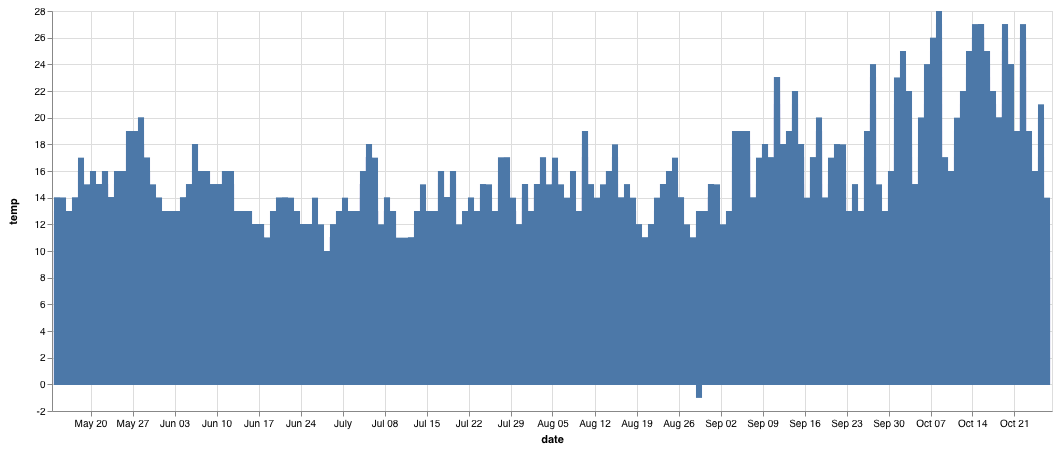

In [7]:
nl.bar(
    data[['date', 'temp']].tail(5000),
    "date",
    "temp"
)

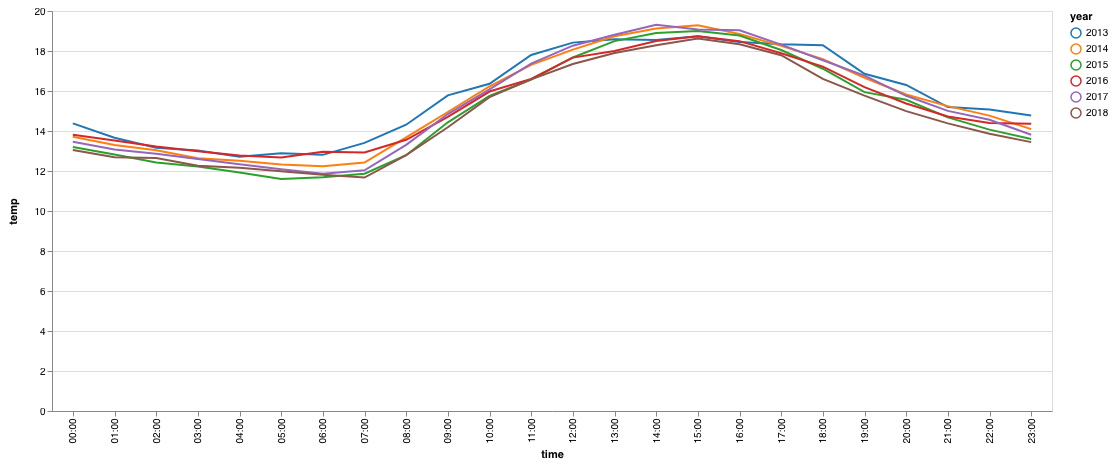

In [8]:
nl.line(
    data.groupby(['time', 'year']).agg({"temp" : "mean"}).reset_index(),
    "time",
    "temp",
    color = "year"
)

In [9]:
# Create an index of if the temp recorded is the max for that day, then filter by this index. Also drop_duplicates makes sure we only have one row per day based on the 'date' and 'temp' fields
idx = data.groupby(['date'])['temp'].transform(max) == data['temp']
data = data[idx].drop_duplicates(['date', 'temp']).reset_index()
data = data[['date', 'time', 'temp', 'year']]
data.head()

,date,time,temp,year
0,2013-08-17,12:00,14.0,2013
1,2013-08-18,14:00,17.0,2013
2,2013-08-19,15:00,11.0,2013
3,2013-08-20,14:00,10.0,2013
4,2013-08-23,13:00,14.0,2013


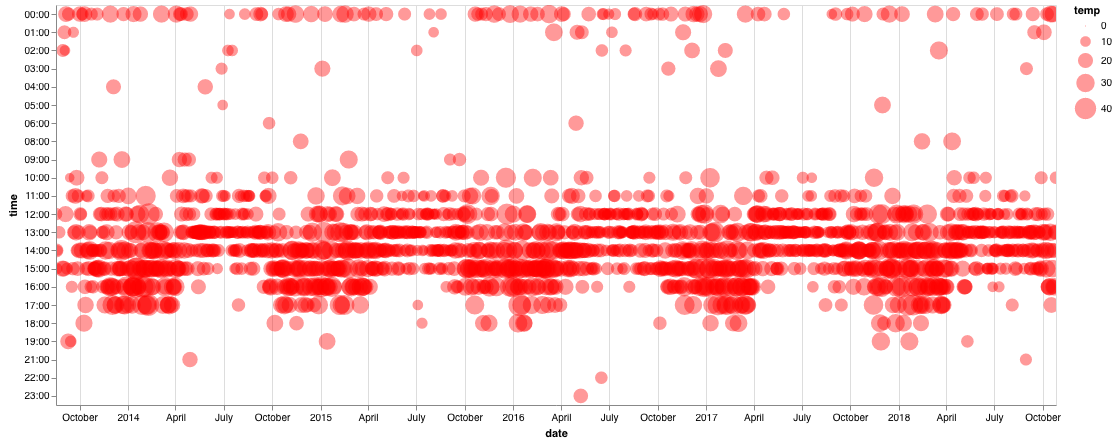

In [10]:
nl.scatter(
    data,
    "date:T",
    "time",
    size = "temp",
    color = "red",
    range = [1, 500]
).properties(
    height = 400
).mark_circle(
    opacity = 0.4
)